[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AdityaPunetha/Chess-board-recognition-and-solving/blob/main/Backend/preprocessing%20and%20training/training.ipynb)


# Importing dependencies

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Checking Data

In [4]:
Train_Data = np.load('V10_100x100_Grayscale.npy',allow_pickle=True)

In [5]:
Train_Data[0][0].shape

(100, 100)

In [6]:
def show_image(data,index):
    plt.imshow(data[index][0],cmap='gray')
    plt.title(data[index][1])

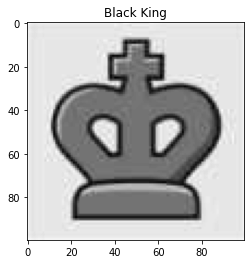

In [7]:
show_image(Train_Data,0)

# Seperating Data

In [8]:
X_train = Train_Data[:,0]
y_train = Train_Data[:,1]

In [9]:
X_train.shape

(92,)

In [10]:
y_train[:5]

array(['Black King', 'Black King', 'Black King', 'Black King',
       'Black Queen'], dtype=object)

In [11]:
classes = np.unique(y_train)
classes

array(['Black Bishop', 'Black King', 'Black Knight', 'Black Pawn',
       'Black Queen', 'Black Rook', 'Blank', 'White Bishop', 'White King',
       'White Knight', 'White Pawn', 'White Queen', 'White Rook'],
      dtype=object)

In [12]:
len(classes)

13

# Encoding Data

In [14]:
label_encoder = LabelEncoder()

In [15]:
y_train = label_encoder.fit_transform(y_train)
y_train[:5]

array([1, 1, 1, 1, 4])

In [16]:
def plot_sample_labels(X, y, index):
    plt.imshow(X[index], cmap='gray')
    plt.title(label_encoder.classes_[y[index]])

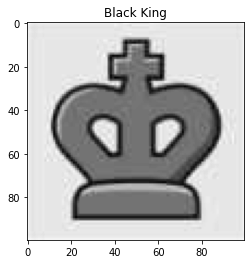

In [17]:
plot_sample_labels(X_train, y_train, 0)

# Transforming Data

In [22]:
x = []

In [23]:
for i in X_train:
  x.append(i.reshape(100,100,1))
x = np.array(x)

In [24]:
x.shape

(92, 100, 100, 1)

In [25]:
X_train = x/255

# Preparing Model

In [27]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100,100,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(13, activation='softmax')
])

In [28]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
3/3 [==============================] - 2s 333ms/step - loss: 2.6476 - accuracy: 0.0870
Epoch 2/10
3/3 [==============================] - 1s 322ms/step - loss: 2.4164 - accuracy: 0.2935
Epoch 3/10
3/3 [==============================] - 1s 323ms/step - loss: 2.2748 - accuracy: 0.1957
Epoch 4/10
3/3 [==============================] - 1s 337ms/step - loss: 1.9881 - accuracy: 0.5217
Epoch 5/10
3/3 [==============================] - 1s 326ms/step - loss: 1.6821 - accuracy: 0.6413
Epoch 6/10
3/3 [==============================] - 1s 327ms/step - loss: 1.3866 - accuracy: 0.7065
Epoch 7/10
3/3 [==============================] - 1s 327ms/step - loss: 1.0731 - accuracy: 0.7935
Epoch 8/10
3/3 [==============================] - 1s 322ms/step - loss: 0.8088 - accuracy: 0.8478
Epoch 9/10
3/3 [==============================] - 1s 324ms/step - loss: 0.5502 - accuracy: 0.9239
Epoch 10/10
3/3 [==============================] - 1s 319ms/step - loss: 0.3462 - accuracy: 1.0000


In [30]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# Saving the model

In [31]:
cnn.save('V10_100x100_Grayscale_v1')

INFO:tensorflow:Assets written to: V10_100x100_Grayscale_v1/assets


In [32]:
!zip -r /content/V10_100x100_Grayscale_v1.zip /content/V10_100x100_Grayscale_v1

  adding: content/V10_100x100_Grayscale_v1/ (stored 0%)
  adding: content/V10_100x100_Grayscale_v1/saved_model.pb (deflated 88%)
  adding: content/V10_100x100_Grayscale_v1/variables/ (stored 0%)
  adding: content/V10_100x100_Grayscale_v1/variables/variables.index (deflated 65%)
  adding: content/V10_100x100_Grayscale_v1/variables/variables.data-00000-of-00001 (deflated 27%)
  adding: content/V10_100x100_Grayscale_v1/assets/ (stored 0%)
  adding: content/V10_100x100_Grayscale_v1/keras_metadata.pb (deflated 90%)
